In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
os.chdir(os.getcwd())

In [3]:
!ls

file1.csv		 predictionLRW.csv	       Untitled1.ipynb
partner_id_VS_Fraud.csv  test_data-1599717650029.csv   Untitled-Copy1.ipynb
predictionDT.csv	 testdataTN.csv		       Untitled.ipynb
predictionLR.csv	 train_data-1599717478076.csv  user_id_VS_Fraud.csv


In [4]:
Train_data = pd.read_csv('train_data-1599717478076.csv')
Train_data

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
0,144703125000,17539344,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-5.0,2016-11-15 19:16:12+00:00,2,0
1,77406814453032,24710841,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,100.0,2017-01-11 09:25:33+00:00,2,0
2,308929485482801,24265476,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,50.0,2016-12-07 07:58:09+00:00,2,0
3,665270027747073,10240000,other_debit_cards,102557,cat_3,IND_INR,other_pcs,1000.0,2017-01-11 16:15:44+00:00,2,0
4,38276160171101,5880625,other_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2016-11-16 17:04:42+00:00,2,0
...,...,...,...,...,...,...,...,...,...,...,...
76524,179759462245453,19686969,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-100.0,2016-11-30 13:40:45+00:00,2,0
76525,2693567760244353,11662225,visa_master_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2017-01-08 08:35:31+00:00,2,0
76526,119750257089000,374544,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-3.5,2016-12-26 21:47:08+00:00,2,0
76527,1949798765017089,1687401,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-20.0,2016-12-11 13:44:06+00:00,2,0


In [5]:
Test_data = pd.read_csv('test_data-1599717650029.csv')
Test_data

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category
0,857050141038272,3802500,visa_master_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2016-12-28 14:44:37+00:00,2
1,4400462872603,200704,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,20.0,2016-12-14 17:49:48+00:00,2
2,1207915598569499,25150225,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-100.0,2017-01-21 10:18:11+00:00,2
3,2009725616777536,21827584,visa_master_credit_cards,78890,cat_2,IND_INR,other_pcs,200.0,2017-01-16 13:25:10+00:00,1
4,2319205210274863,576081,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,100.0,2017-02-09 12:47:28+00:00,2
...,...,...,...,...,...,...,...,...,...,...
19128,5332775378111,13235044,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,20.0,2017-01-01 13:02:16+00:00,2
19129,939262915465237,12257001,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,30.0,2016-12-26 19:41:23+00:00,2
19130,18324574916544,5958481,visa_master_debit_cards,23667,cat_2,IND_INR,other_pcs,20.0,2016-12-24 04:29:06+00:00,4
19131,893473728055875,53919649,sbi_atm_cum_debit_card,78890,cat_2,IND_INR,android_devices,-500.0,2016-12-04 15:38:47+00:00,4


In [6]:
Train_data.describe()

,transaction_number,user_id,partner_id,money_transacted,partner_pricing_category,is_fraud
count,7.652900e+04,7.652900e+04,76529.000000,76529.000000,76529.000000,76529.000000
mean,6.940200e+14,1.247483e+07,58497.189105,132.724348,2.255707,0.002012
std,7.867885e+14,1.205878e+07,36740.216787,2350.110900,0.732174,0.044814
min,8.000000e+00,1.000000e+00,7889.000000,-20000.000000,0.000000,0.000000
25%,4.387866e+13,3.515625e+06,23667.000000,-1.000000,2.000000,0.000000
50%,3.452540e+14,9.753129e+06,47334.000000,20.000000,2.000000,0.000000
75%,1.173440e+15,1.788444e+07,78890.000000,52.000000,2.000000,0.000000
max,2.784238e+15,5.592048e+07,213003.000000,197217.760000,4.000000,1.000000


In [7]:
Test_data.describe()

,transaction_number,user_id,partner_id,money_transacted,partner_pricing_category
count,1.913300e+04,1.913300e+04,19133.000000,19133.000000,19133.000000
mean,7.037622e+14,1.261609e+07,58656.424084,140.886995,2.257043
std,7.946458e+14,1.228365e+07,36692.507399,2883.975048,0.735934
min,1.000000e+00,3.600000e+01,7889.000000,-20000.000000,0.000000
25%,4.313645e+13,3.515625e+06,23667.000000,-1.000000,2.000000
50%,3.585617e+14,9.922500e+06,47334.000000,20.000000,2.000000
75%,1.184018e+15,1.796064e+07,78890.000000,60.000000,2.000000
max,2.783822e+15,5.593544e+07,213003.000000,197600.000000,4.000000


In [8]:
Train_data.dtypes

transaction_number            int64
user_id                       int64
payment_method               object
partner_id                    int64
partner_category             object
country                      object
device_type                  object
money_transacted            float64
transaction_initiation       object
partner_pricing_category      int64
is_fraud                      int64
dtype: object

In [9]:
Test_data.dtypes

transaction_number            int64
user_id                       int64
payment_method               object
partner_id                    int64
partner_category             object
country                      object
device_type                  object
money_transacted            float64
transaction_initiation       object
partner_pricing_category      int64
dtype: object

In [10]:
col_names=['transaction_number','user_id','payment_method','partner_id', 'partner_category', 'country', 'device_type', 'partner_pricing_category']
Train_data[col_names] = Train_data[col_names].astype('category')
Train_data['is_fraud'] = Train_data['is_fraud'].astype('category')
Test_data[col_names] = Test_data[col_names].astype('category')

In [11]:
Train_data.dtypes

transaction_number          category
user_id                     category
payment_method              category
partner_id                  category
partner_category            category
country                     category
device_type                 category
money_transacted             float64
transaction_initiation        object
partner_pricing_category    category
is_fraud                    category
dtype: object

In [12]:
Test_data.dtypes

transaction_number          category
user_id                     category
payment_method              category
partner_id                  category
partner_category            category
country                     category
device_type                 category
money_transacted             float64
transaction_initiation        object
partner_pricing_category    category
dtype: object

obj_df_replace_nums = {"num_doors":     {'1', "two": 2}}

In [13]:
#Number of unique transaction numbers
print("The number of unique transaction numbers  in the train data set")
print(Train_data['transaction_number'].nunique())

#Number of unique userID's
print("The number of unique user ID's in the train data set")
print(Train_data['user_id'].nunique())

#Number of unique payment methods
print("The number of unique payment methods in the train data set")
print(Train_data['payment_method'].nunique())

#Number of unique partner ids
print("The number of unique partner ids in the train data set")
print(Train_data['partner_id'].nunique())

#Number of unique partner categories
print("The number of unique partner categories in the train data set")
print(Train_data['partner_category'].nunique())

#Number of unique countries
print("The number of unique countries in the train data set")
print(Train_data['country'].nunique())

#Number of unique device types
print("The number of unique device types in the train data set")
print(Train_data['device_type'].nunique())

#Number of unique partner pricing categories
print("The number of unique partner pricing categories in the train data set")
print(Train_data['partner_pricing_category'].nunique())


The number of unique transaction numbers  in the train data set
76529
The number of unique user ID's in the train data set
3594
The number of unique payment methods in the train data set
6
The number of unique partner ids in the train data set
23
The number of unique partner categories in the train data set
9
The number of unique countries in the train data set
1
The number of unique device types in the train data set
4
The number of unique partner pricing categories in the train data set
4


In [14]:
#Number of unique transaction numbers
print("The number of unique transaction numbers  in the test data set")
print(Test_data['transaction_number'].nunique())

#Number of unique userID's
print("The number of unique user ID's in the test data set")
print(Test_data['user_id'].nunique())

#Number of unique payment methods
print("The number of unique payment methods in the test data set")
print(Test_data['payment_method'].nunique())

#Number of unique partner ids
print("The number of unique partner ids in the test data set")
print(Test_data['partner_id'].nunique())

#Number of unique partner categories
print("The number of unique partner categories in the test data set")
print(Test_data['partner_category'].nunique())

#Number of unique countries
print("The number of unique countries in the test data set")
print(Test_data['country'].nunique())

#Number of unique device types
print("The number of unique device types in the test data set")
print(Test_data['device_type'].nunique())

#Number of unique partner pricing categories
print("The number of unique partner pricing categories in the test data set")
print(Test_data['partner_pricing_category'].nunique())

The number of unique transaction numbers  in the test data set
19133
The number of unique user ID's in the test data set
2617
The number of unique payment methods in the test data set
6
The number of unique partner ids in the test data set
20
The number of unique partner categories in the test data set
8
The number of unique countries in the test data set
1
The number of unique device types in the test data set
4
The number of unique partner pricing categories in the test data set
4


__Observation:__ 
- Clearly transaction numbers is unique for each row and offers zero variance. Hence it can be deleted. 
- Country has only one unique value, so it can aslo be droped
- The rest of the columns are not unique and hence it cannot be deleted.

In [15]:
Train_data = Train_data.drop(['transaction_number', 'country'], axis=1)
Test_data = Test_data.drop(['transaction_number', 'country'], axis=1)

In [16]:
Train_data.describe(include='all')

,user_id,payment_method,partner_id,partner_category,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
count,76529.0,76529,76529.0,76529,76529,76529.000000,76529,76529.0,76529.0
unique,3594.0,6,23.0,9,4,NaN,75811,4.0,2.0
top,53919649.0,sbi_atm_cum_debit_card,47334.0,cat_1,other_pcs,NaN,2016-12-24 16:30:13+00:00,2.0,0.0
freq,3240.0,30538,26105.0,36306,45560,NaN,12,63899.0,76375.0
mean,NaN,NaN,NaN,NaN,NaN,132.724348,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,2350.110900,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,-20000.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,20.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,52.000000,NaN,NaN,NaN


In [17]:
Test_data.describe(include='all')

,user_id,payment_method,partner_id,partner_category,device_type,money_transacted,transaction_initiation,partner_pricing_category
count,19133.0,19133,19133.0,19133,19133,19133.000000,19133,19133.0
unique,2617.0,6,20.0,8,4,NaN,19090,4.0
top,53919649.0,sbi_atm_cum_debit_card,47334.0,cat_1,other_pcs,NaN,2016-12-24 16:30:13+00:00,2.0
freq,851.0,7651,6530.0,9099,11375,NaN,5,15949.0
mean,NaN,NaN,NaN,NaN,NaN,140.886995,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,2883.975048,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,-20000.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,20.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,60.000000,NaN,NaN


(-1000, 3000)

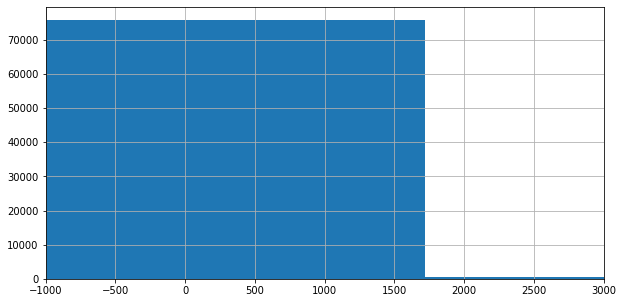

In [18]:
Train_data['money_transacted'].hist(figsize=(10, 5));
plt.xlim([-1000, 3000])

(-1000, 3000)

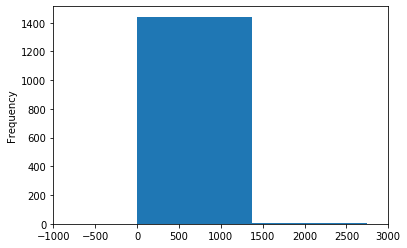

In [19]:

fig, ax = plt.subplots()
Train_data['money_transacted'].value_counts().plot(ax=ax, kind='hist')
plt.xlim([-1000, 3000])

In [20]:
Train_data['is_fraud'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [21]:
def getProbOfFraud(col, target, df, forGraph=True):
    crosstab = pd.crosstab(index = df[col], columns = df[target])
    crosstab.columns = pd.Index(list(crosstab.columns))
    crosstab = crosstab.reset_index() 
    crosstab['TotalCount'] = crosstab[1] + crosstab[0]
    crosstab['ProbOfFraud'] = crosstab[1] / crosstab['TotalCount']
    
    print(crosstab.head())
    if forGraph:
        return crosstab[[col, 'ProbOfFraud']]
    else:
        return crosstab[[col, 'TotalCount', 'ProbOfFraud']]

In [22]:
data = getProbOfFraud('money_transacted', 'is_fraud', Train_data)

   money_transacted  0  1  TotalCount  ProbOfFraud
0          -20000.0  1  0           1          0.0
1          -18000.0  0  1           1          1.0
2          -10000.0  0  3           3          1.0
3           -4000.0  7  0           7          0.0
4           -3200.0  1  0           1          0.0


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
Test_data.isnull().sum()

user_id                     0
payment_method              0
partner_id                  0
partner_category            0
device_type                 0
money_transacted            0
transaction_initiation      0
partner_pricing_category    0
dtype: int64

In [25]:
Train_data.dtypes

user_id                     category
payment_method              category
partner_id                  category
partner_category            category
device_type                 category
money_transacted             float64
transaction_initiation        object
partner_pricing_category    category
is_fraud                    category
dtype: object

In [26]:
Train_data.describe(include='category')

,user_id,payment_method,partner_id,partner_category,device_type,partner_pricing_category,is_fraud
count,76529,76529,76529,76529,76529,76529,76529
unique,3594,6,23,9,4,4,2
top,53919649,sbi_atm_cum_debit_card,47334,cat_1,other_pcs,2,0
freq,3240,30538,26105,36306,45560,63899,76375


In [27]:
## Custom Function for Bar Plots

def barplot(column,df):
    bar_plot1 = sns.countplot(x=column, data=df)
    
    total = len(df[column])
    for p in bar_plot1.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        height = p.get_height()
        bar_plot1.text(p.get_x()+ p.get_width()/2, height + 400, percentage, ha="center")

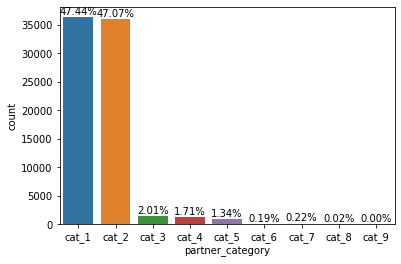

In [28]:
barplot("partner_category",Train_data)

df['Handicapped']=df['Handicapped'].astype('int')
df.loc[df.Handicapped > 1, 'Handicapped'] = 
df['Handicapped']=df['Handicapped'].astype('category')

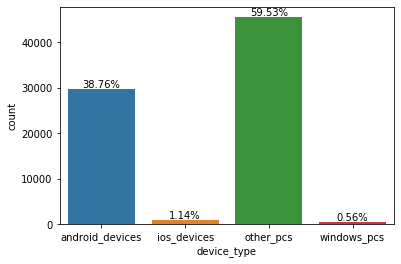

In [29]:
barplot("device_type",Train_data)

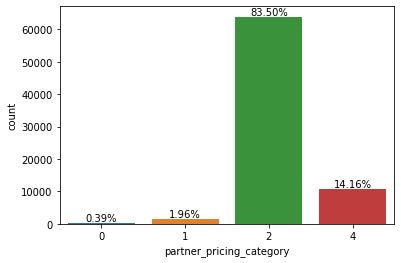

In [30]:
barplot("partner_pricing_category",Train_data)

In [31]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

## conda install -c anaconda statsmodels
import statsmodels.api as sm

In [32]:
myField1 = Train_data['is_fraud']
myField2 = Train_data['user_id']
myCrosstable = pd.crosstab(myField1, myField2)
chiVal, pVal, df, exp = chi2_contingency(myCrosstable)
chiVal, pVal, df, exp

(24740.852099031847,
 0.0,
 3593,
 array([[9.97987691e-01, 9.97987691e-01, 9.97987691e-01, ...,
         1.89617661e+01, 9.97987691e-01, 9.97987691e-01],
        [2.01230906e-03, 2.01230906e-03, 2.01230906e-03, ...,
         3.82338721e-02, 2.01230906e-03, 2.01230906e-03]]))

In [33]:
#pvalue is lesthan alpha value hence it is dependent

In [34]:
myField1 = Train_data['is_fraud']
myField2 = Train_data['payment_method']
myCrosstable = pd.crosstab(myField1, myField2)
chiVal, pVal, df, exp = chi2_contingency(myCrosstable)
chiVal, pVal, df, exp

(732.212520688412,
 5.316478181917259e-156,
 5,
 array([[2.73288949e+04, 4.48595467e+03, 3.04765481e+04, 1.49698154e+01,
         2.44906179e+03, 1.16195707e+04],
        [5.51050713e+01, 9.04532922e+00, 6.14518941e+01, 3.01846359e-02,
         4.93820643e+00, 2.34293144e+01]]))

In [35]:
#pvalue is lesthan alpha value hence it is dependent

In [36]:
myField1 = Train_data['is_fraud']
myField2 = Train_data['partner_id']
myCrosstable = pd.crosstab(myField1, myField2)
chiVal, pVal, df, exp = chi2_contingency(myCrosstable)
chiVal, pVal, df, exp

(1101.5186766778486,
 4.635079748110754e-219,
 22,
 array([[2.31233748e+03, 1.88619674e+02, 1.94867077e+04, 1.88819271e+03,
         1.89617661e+01, 2.60524687e+04, 7.48490768e+01, 1.58680043e+02,
         1.49698154e+01, 1.22483029e+04, 1.11874420e+03, 1.99597538e+00,
         2.30535157e+02, 6.38712122e+02, 9.52679050e+03, 9.97987691e+00,
         7.65456559e+02, 1.64667969e+02, 1.21355303e+03, 8.88209045e+01,
         9.97987691e-01, 1.45706203e+02, 2.49496923e+01],
        [4.66252009e+00, 3.80326412e-01, 3.92923467e+01, 3.80728874e+00,
         3.82338721e-02, 5.25313280e+01, 1.50923179e-01, 3.19957140e-01,
         3.01846359e-02, 2.46970691e+01, 2.25579846e+00, 4.02461812e-03,
         4.64843393e-01, 1.28787780e+00, 1.92095023e+01, 2.01230906e-02,
         1.54344105e+00, 3.32030995e-01, 2.44696782e+00, 1.79095506e-01,
         2.01230906e-03, 2.93797123e-01, 5.03077265e-02]]))

In [37]:
#pvalue is lesthan alpha value hence it is dependent

In [38]:
myField1 = Train_data['is_fraud']
myField2 = Train_data['partner_category']
myCrosstable = pd.crosstab(myField1, myField2)
chiVal, pVal, df, exp = chi2_contingency(myCrosstable)
chiVal, pVal, df, exp

(204.59857652283367,
 6.8587853565513275e-40,
 8,
 array([[3.62329411e+04, 3.59465186e+04, 1.53290909e+03, 1.30736388e+03,
         1.02393537e+03, 1.45706203e+02, 1.64667969e+02, 1.89617661e+01,
         1.99597538e+00],
        [7.30588927e+01, 7.24813600e+01, 3.09090672e+00, 2.63612487e+00,
         2.06462909e+00, 2.93797123e-01, 3.32030995e-01, 3.82338721e-02,
         4.02461812e-03]]))

In [39]:
myField1 = Train_data['is_fraud']
myField2 = Train_data['device_type']
myCrosstable = pd.crosstab(myField1, myField2)
chiVal, pVal, df, exp = chi2_contingency(myCrosstable)
chiVal, pVal, df, exp

(94.38499137516988,
 2.5031183694642124e-20,
 3,
 array([[2.96023109e+04, 8.74237217e+02, 4.54683192e+04, 4.30132695e+02],
        [5.96891113e+01, 1.76278274e+00, 9.16808007e+01, 8.67305205e-01]]))

In [40]:
#pvalue is lesthan alpha value hence it is dependent

In [41]:
myField1 = Train_data['is_fraud']
myField2 = Train_data['partner_pricing_category']
myCrosstable = pd.crosstab(myField1, myField2)
chiVal, pVal, df, exp = chi2_contingency(myCrosstable)
chiVal, pVal, df, exp

(1351.5803567791647,
 9.456633670840907e-293,
 3,
 array([[2.99396307e+02, 1.49398757e+03, 6.37704155e+04, 1.08112007e+04],
        [6.03692718e-01, 3.01242666e+00, 1.28584537e+02, 2.17993440e+01]]))

by chi square test of independence we have found that all categorical variables are dependent with respect to variable so we can't drop any attributes

In [42]:
partner_id_Train_data = getProbOfFraud('partner_id', 'is_fraud', Train_data, forGraph=False)
partner_id_Train_data.to_csv('partner_id_VS_Fraud.csv', index=False)

  partner_id      0  1  TotalCount  ProbOfFraud
0       7889   2317  0        2317     0.000000
1      15778    189  0         189     0.000000
2      23667  19517  9       19526     0.000461
3      31556   1892  0        1892     0.000000
4      39445     17  2          19     0.105263


In [43]:
user_id_Train_data = getProbOfFraud('user_id', 'is_fraud', Train_data, forGraph=False)
user_id_Train_data.to_csv('user_id_VS_Fraud.csv', index=False)

  user_id  0  1  TotalCount  ProbOfFraud
0       1  1  0           1          0.0
1       4  1  0           1          0.0
2       9  1  0           1          0.0
3      16  1  0           1          0.0
4      25  1  0           1          0.0


In [44]:
Train_data = Train_data.drop(['user_id', 'partner_id'], axis=1)

In [45]:
Test_data = Test_data.drop(['user_id', 'partner_id'], axis=1)

In [46]:
Train_data['is_fraud'].value_counts(normalize=True)*100

0    99.798769
1     0.201231
Name: is_fraud, dtype: float64

In [47]:
Train_data['Tran_DateTime'] = pd.to_datetime(Train_data['transaction_initiation'])
Train_data['Tran_date'] = Train_data['Tran_DateTime'].dt.date
Train_data['Tran_month']=Train_data['Tran_DateTime'].dt.month
Train_data['Tran_hour'] = Train_data['Tran_DateTime'].dt.hour
Train_data['Tran_weekday']=Train_data['Tran_DateTime'].dt.weekday

In [48]:
Train_data.shape

(76529, 12)

In [49]:
Train_data.head()

,payment_method,partner_category,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud,Tran_DateTime,Tran_date,Tran_month,Tran_hour,Tran_weekday
0,sbi_atm_cum_debit_card,cat_1,android_devices,-5.0,2016-11-15 19:16:12+00:00,2,0,2016-11-15 19:16:12+00:00,2016-11-15,11,19,1
1,e_wallet_payments,cat_2,other_pcs,100.0,2017-01-11 09:25:33+00:00,2,0,2017-01-11 09:25:33+00:00,2017-01-11,1,9,2
2,e_wallet_payments,cat_2,other_pcs,50.0,2016-12-07 07:58:09+00:00,2,0,2016-12-07 07:58:09+00:00,2016-12-07,12,7,2
3,other_debit_cards,cat_3,other_pcs,1000.0,2017-01-11 16:15:44+00:00,2,0,2017-01-11 16:15:44+00:00,2017-01-11,1,16,2
4,other_debit_cards,cat_1,other_pcs,200.0,2016-11-16 17:04:42+00:00,2,0,2016-11-16 17:04:42+00:00,2016-11-16,11,17,2


In [50]:
Train_data.describe(include='all')

/usr/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,payment_method,partner_category,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud,Tran_DateTime,Tran_date,Tran_month,Tran_hour,Tran_weekday
count,76529,76529,76529,76529.000000,76529,76529.0,76529.0,76529,76529,76529.000000,76529.000000,76529.000000
unique,6,9,4,NaN,75811,4.0,2.0,75811,91,NaN,NaN,NaN
top,sbi_atm_cum_debit_card,cat_1,other_pcs,NaN,2016-12-24 16:30:13+00:00,2.0,0.0,2016-12-24 16:30:13+00:00,2017-02-01,NaN,NaN,NaN
freq,30538,36306,45560,NaN,12,63899.0,76375.0,12,2386,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-11-15 02:18:49+00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-13 10:01:28+00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,132.724348,NaN,NaN,NaN,NaN,NaN,6.576958,12.452260,2.976911
std,NaN,NaN,NaN,2350.110900,NaN,NaN,NaN,NaN,NaN,5.223658,4.850698,1.929435
min,NaN,NaN,NaN,-20000.000000,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000
25%,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,8.000000,2.000000


In [51]:
Test_data['Tran_DateTime'] = pd.to_datetime(Test_data['transaction_initiation'])
Test_data['Tran_date'] = Test_data['Tran_DateTime'].dt.date
Test_data['Tran_month']=Test_data['Tran_DateTime'].dt.month
Test_data['Tran_hour'] = Test_data['Tran_DateTime'].dt.hour
Test_data['Tran_weekday']=Test_data['Tran_DateTime'].dt.weekday

In [52]:
Test_data.head()

,payment_method,partner_category,device_type,money_transacted,transaction_initiation,partner_pricing_category,Tran_DateTime,Tran_date,Tran_month,Tran_hour,Tran_weekday
0,visa_master_debit_cards,cat_1,other_pcs,200.0,2016-12-28 14:44:37+00:00,2,2016-12-28 14:44:37+00:00,2016-12-28,12,14,2
1,e_wallet_payments,cat_2,other_pcs,20.0,2016-12-14 17:49:48+00:00,2,2016-12-14 17:49:48+00:00,2016-12-14,12,17,2
2,sbi_atm_cum_debit_card,cat_1,android_devices,-100.0,2017-01-21 10:18:11+00:00,2,2017-01-21 10:18:11+00:00,2017-01-21,1,10,5
3,visa_master_credit_cards,cat_2,other_pcs,200.0,2017-01-16 13:25:10+00:00,1,2017-01-16 13:25:10+00:00,2017-01-16,1,13,0
4,e_wallet_payments,cat_2,other_pcs,100.0,2017-02-09 12:47:28+00:00,2,2017-02-09 12:47:28+00:00,2017-02-09,2,12,3


In [53]:
Train_data.shape

(76529, 12)

In [54]:
Train_data.describe(include='all')

/usr/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,payment_method,partner_category,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud,Tran_DateTime,Tran_date,Tran_month,Tran_hour,Tran_weekday
count,76529,76529,76529,76529.000000,76529,76529.0,76529.0,76529,76529,76529.000000,76529.000000,76529.000000
unique,6,9,4,NaN,75811,4.0,2.0,75811,91,NaN,NaN,NaN
top,sbi_atm_cum_debit_card,cat_1,other_pcs,NaN,2016-12-24 16:30:13+00:00,2.0,0.0,2016-12-24 16:30:13+00:00,2017-02-01,NaN,NaN,NaN
freq,30538,36306,45560,NaN,12,63899.0,76375.0,12,2386,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-11-15 02:18:49+00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-13 10:01:28+00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,132.724348,NaN,NaN,NaN,NaN,NaN,6.576958,12.452260,2.976911
std,NaN,NaN,NaN,2350.110900,NaN,NaN,NaN,NaN,NaN,5.223658,4.850698,1.929435
min,NaN,NaN,NaN,-20000.000000,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000
25%,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,8.000000,2.000000


In [55]:
Test_data.shape

(19133, 11)

In [56]:
Test_data.describe(include='all')

/usr/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,payment_method,partner_category,device_type,money_transacted,transaction_initiation,partner_pricing_category,Tran_DateTime,Tran_date,Tran_month,Tran_hour,Tran_weekday
count,19133,19133,19133,19133.000000,19133,19133.0,19133,19133,19133.000000,19133.000000,19133.000000
unique,6,8,4,NaN,19090,4.0,19090,91,NaN,NaN,NaN
top,sbi_atm_cum_debit_card,cat_1,other_pcs,NaN,2016-12-24 16:30:13+00:00,2.0,2016-12-24 16:30:13+00:00,2017-01-25,NaN,NaN,NaN
freq,7651,9099,11375,NaN,5,15949.0,5,601,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,2016-11-15 03:32:55+00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-13 09:20:36+00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,140.886995,NaN,NaN,NaN,NaN,6.523337,12.429572,2.988711
std,NaN,NaN,NaN,2883.975048,NaN,NaN,NaN,NaN,5.226837,4.832087,1.933176
min,NaN,NaN,NaN,-20000.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000
25%,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,1.000000,8.000000,2.000000


In [57]:
Train_data['Tran_date'].describe()

count          76529
unique            91
top       2017-02-01
freq            2386
Name: Tran_date, dtype: object

In [58]:
Test_data['Tran_date'].describe()

count          19133
unique            91
top       2017-01-25
freq             601
Name: Tran_date, dtype: object

In [59]:
Train_data = Train_data.drop(['transaction_initiation','Tran_DateTime','Tran_date'], axis=1)

In [60]:
Test_data = Test_data.drop(['transaction_initiation','Tran_DateTime','Tran_date'], axis=1)

In [61]:
Train_data.shape

(76529, 9)

In [62]:
Test_data.shape

(19133, 8)

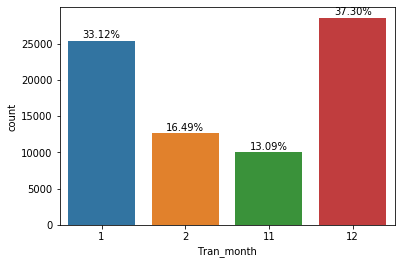

In [63]:
barplot("Tran_month",Train_data)

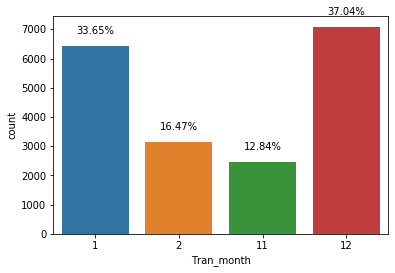

In [64]:
barplot("Tran_month",Test_data)

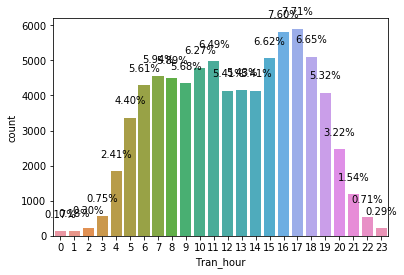

In [65]:
barplot("Tran_hour",Train_data)

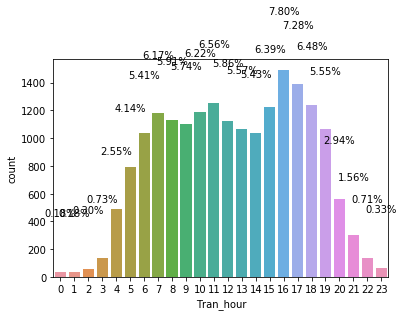

In [66]:
barplot("Tran_hour",Test_data)

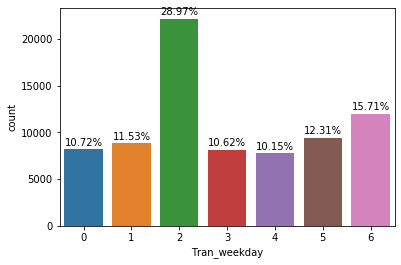

In [67]:
barplot("Tran_weekday",Train_data)

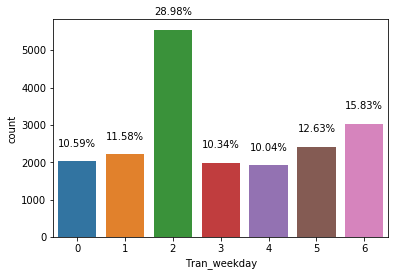

In [68]:
barplot("Tran_weekday",Test_data)

They all show varience so we can't remove any of the rows

In [69]:
Train_data.dtypes

payment_method              category
partner_category            category
device_type                 category
money_transacted             float64
partner_pricing_category    category
is_fraud                    category
Tran_month                     int64
Tran_hour                      int64
Tran_weekday                   int64
dtype: object

In [70]:
Test_data.dtypes

payment_method              category
partner_category            category
device_type                 category
money_transacted             float64
partner_pricing_category    category
Tran_month                     int64
Tran_hour                      int64
Tran_weekday                   int64
dtype: object

In [71]:
for col in ['Tran_month', 'Tran_weekday']:
    Train_data[col] = Train_data[col].astype('category')
    Test_data[col] = Test_data[col].astype('category')


In [72]:
Train_data.dtypes

payment_method              category
partner_category            category
device_type                 category
money_transacted             float64
partner_pricing_category    category
is_fraud                    category
Tran_month                  category
Tran_hour                      int64
Tran_weekday                category
dtype: object

In [73]:
Test_data.dtypes

payment_method              category
partner_category            category
device_type                 category
money_transacted             float64
partner_pricing_category    category
Tran_month                  category
Tran_hour                      int64
Tran_weekday                category
dtype: object

In [74]:
data1 = getProbOfFraud('Tran_hour', 'is_fraud', Train_data)

   Tran_hour     0  1  TotalCount  ProbOfFraud
0          0   132  1         133     0.007519
1          1   141  0         141     0.000000
2          2   231  0         231     0.000000
3          3   569  6         575     0.010435
4          4  1841  0        1841     0.000000


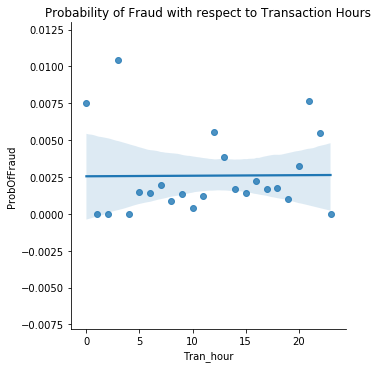

In [75]:
sns.lmplot(data = data1, x = 'Tran_hour', y = 'ProbOfFraud', fit_reg = True)
plt.title('Probability of Fraud with respect to Transaction Hours')
plt.show()

There is clear trend in above graph, showcasing the effect of scheduled hour on no-show up. We can bin Scheduled hour with bin size of 4 hours

In [76]:
Train_data['Tran_hour'].unique()

array([19,  9,  7, 16, 17,  4, 20, 10,  6, 13, 14, 11,  8, 15, 18, 12,  5,
       23, 21,  1,  3, 22,  0,  2])

In [77]:
#Binning 
def get_session_of_day(x):
    if x < 4:
        return 'Midnight'
    elif (x >= 4) and (x < 8 ):
        return 'EarlyMorning'
    elif (x >= 8) and (x < 12 ):
        return 'Morning'
    elif (x >= 12) and (x < 16):
        return'Noon'
    elif (x >= 16) and (x < 20) :
        return 'Eve'
    elif (x >= 20) and (x < 24):
        return'Night'

In [78]:
Train_data['Tran_session_of_day'] = Train_data['Tran_hour'].apply(get_session_of_day)

In [79]:
Train_data=Train_data.drop('Tran_hour',axis=1)
Train_data['Tran_session_of_day']=Train_data['Tran_session_of_day'].astype('category')
Train_data.dtypes

payment_method              category
partner_category            category
device_type                 category
money_transacted             float64
partner_pricing_category    category
is_fraud                    category
Tran_month                  category
Tran_weekday                category
Tran_session_of_day         category
dtype: object

In [80]:
Test_data['Tran_session_of_day'] = Test_data['Tran_hour'].apply(get_session_of_day)

In [81]:
Test_data=Test_data.drop('Tran_hour',axis=1)

In [82]:
Test_data['Tran_session_of_day']=Test_data['Tran_session_of_day'].astype('category')

In [83]:
Test_data.dtypes

payment_method              category
partner_category            category
device_type                 category
money_transacted             float64
partner_pricing_category    category
Tran_month                  category
Tran_weekday                category
Tran_session_of_day         category
dtype: object

labels = bins[:-1]
print(labels)
df['_binned'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

In [84]:
myField1 = Train_data['is_fraud']
myField2 = Train_data['Tran_month']
myCrosstable = pd.crosstab(myField1, myField2)
chiVal, pVal, df, exp = chi2_contingency(myCrosstable)
chiVal, pVal, df, exp

(17.37760219661224,
 0.0005909621971541256,
 3,
 array([[2.52939980e+04, 1.25956026e+04, 9.99484672e+03, 2.84905526e+04],
        [5.10019731e+01, 2.53973526e+01, 2.01532752e+01, 5.74473990e+01]]))

In [85]:
myField1 = Train_data['is_fraud']
myField2 = Train_data['Tran_weekday']
myCrosstable = pd.crosstab(myField1, myField2)
chiVal, pVal, df, exp = chi2_contingency(myCrosstable)
chiVal, pVal, df, exp

(22.310929281498844,
 0.0010633733603864887,
 6,
 array([[8.18848900e+03, 8.80524540e+03, 2.21263851e+04, 8.10864999e+03,
         7.74937442e+03, 9.40104405e+03, 1.19958120e+04],
        [1.65109958e+01, 1.77546028e+01, 4.46149042e+01, 1.63500111e+01,
         1.56255798e+01, 1.89559513e+01, 2.41879549e+01]]))

In [86]:
Train_data['is_fraud'] = Train_data['is_fraud'].astype('int64')
Train_data['is_fraud'].value_counts()

0    76375
1      154
Name: is_fraud, dtype: int64

In [91]:
Train_data_y=Train_data["is_fraud"]
Train_data_X=Train_data.drop('is_fraud', axis=1)
X_train, X_val, y_train, y_val = train_test_split(Train_data_X, Train_data_y, test_size=0.20,random_state=262, stratify=Train_data_y)

In [92]:
num_attr=Train_data_X.select_dtypes(['int64', 'float64']).columns
num_attr

Index(['money_transacted'], dtype='object')

In [93]:
cat_attr = Train_data_X.select_dtypes('category').columns
cat_attr

Index(['payment_method', 'partner_category', 'device_type',
       'partner_pricing_category', 'Tran_month', 'Tran_weekday',
       'Tran_session_of_day'],
      dtype='object')

In [89]:
pip install sklearn-pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn_pandas import DataFrameMapper

In [94]:
# DataFrameMapper, a class for mapping pandas data frame columns to different sklearn transformations
mapper = DataFrameMapper(
  [([continuous_col], StandardScaler()) for continuous_col in num_attr] +
  [([categorical_col], OneHotEncoder(handle_unknown='error')) for categorical_col in cat_attr]
, df_out=True)

In [95]:
print(type(mapper))

<class 'sklearn_pandas.dataframe_mapper.DataFrameMapper'>


In [96]:
mapper.fit(X_train)

X_train_final = mapper.transform(X_train)
X_val_final = mapper.transform(X_val)

In [97]:
mapper.fit(Test_data)
Test_data_final = mapper.transform(Test_data)

In [98]:
X_train_final = X_train_final.drop(['partner_category_x0_cat_9'], axis =1)
X_val_final = X_val_final.drop(['partner_category_x0_cat_9'], axis =1)

In [99]:
X_train_final.head()

,money_transacted,payment_method_x0_e_wallet_payments,payment_method_x0_other_debit_cards,payment_method_x0_sbi_atm_cum_debit_card,payment_method_x0_unified_payments_interface,payment_method_x0_visa_master_credit_cards,payment_method_x0_visa_master_debit_cards,partner_category_x0_cat_1,partner_category_x0_cat_2,partner_category_x0_cat_3,...,Tran_weekday_x0_3,Tran_weekday_x0_4,Tran_weekday_x0_5,Tran_weekday_x0_6,Tran_session_of_day_x0_EarlyMorning,Tran_session_of_day_x0_Eve,Tran_session_of_day_x0_Midnight,Tran_session_of_day_x0_Morning,Tran_session_of_day_x0_Night,Tran_session_of_day_x0_Noon
27852,0.030823,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
44021,0.021996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29462,-0.058325,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15078,-0.101575,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
36383,-0.101575,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [100]:
X_val_final.head()

,money_transacted,payment_method_x0_e_wallet_payments,payment_method_x0_other_debit_cards,payment_method_x0_sbi_atm_cum_debit_card,payment_method_x0_unified_payments_interface,payment_method_x0_visa_master_credit_cards,payment_method_x0_visa_master_debit_cards,partner_category_x0_cat_1,partner_category_x0_cat_2,partner_category_x0_cat_3,...,Tran_weekday_x0_3,Tran_weekday_x0_4,Tran_weekday_x0_5,Tran_weekday_x0_6,Tran_session_of_day_x0_EarlyMorning,Tran_session_of_day_x0_Eve,Tran_session_of_day_x0_Midnight,Tran_session_of_day_x0_Morning,Tran_session_of_day_x0_Night,Tran_session_of_day_x0_Noon
60658,0.030823,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
31815,-0.048616,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
43698,-0.066269,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
39830,-0.048616,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
41411,-0.145707,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [101]:
X_train_final.columns

Index(['money_transacted', 'payment_method_x0_e_wallet_payments',
       'payment_method_x0_other_debit_cards',
       'payment_method_x0_sbi_atm_cum_debit_card',
       'payment_method_x0_unified_payments_interface',
       'payment_method_x0_visa_master_credit_cards',
       'payment_method_x0_visa_master_debit_cards',
       'partner_category_x0_cat_1', 'partner_category_x0_cat_2',
       'partner_category_x0_cat_3', 'partner_category_x0_cat_4',
       'partner_category_x0_cat_5', 'partner_category_x0_cat_6',
       'partner_category_x0_cat_7', 'partner_category_x0_cat_8',
       'device_type_x0_android_devices', 'device_type_x0_ios_devices',
       'device_type_x0_other_pcs', 'device_type_x0_windows_pcs',
       'partner_pricing_category_x0_0', 'partner_pricing_category_x0_1',
       'partner_pricing_category_x0_2', 'partner_pricing_category_x0_4',
       'Tran_month_x0_1', 'Tran_month_x0_2', 'Tran_month_x0_11',
       'Tran_month_x0_12', 'Tran_weekday_x0_0', 'Tran_weekday_x0_1',
 

In [102]:
X_val_final.columns

Index(['money_transacted', 'payment_method_x0_e_wallet_payments',
       'payment_method_x0_other_debit_cards',
       'payment_method_x0_sbi_atm_cum_debit_card',
       'payment_method_x0_unified_payments_interface',
       'payment_method_x0_visa_master_credit_cards',
       'payment_method_x0_visa_master_debit_cards',
       'partner_category_x0_cat_1', 'partner_category_x0_cat_2',
       'partner_category_x0_cat_3', 'partner_category_x0_cat_4',
       'partner_category_x0_cat_5', 'partner_category_x0_cat_6',
       'partner_category_x0_cat_7', 'partner_category_x0_cat_8',
       'device_type_x0_android_devices', 'device_type_x0_ios_devices',
       'device_type_x0_other_pcs', 'device_type_x0_windows_pcs',
       'partner_pricing_category_x0_0', 'partner_pricing_category_x0_1',
       'partner_pricing_category_x0_2', 'partner_pricing_category_x0_4',
       'Tran_month_x0_1', 'Tran_month_x0_2', 'Tran_month_x0_11',
       'Tran_month_x0_12', 'Tran_weekday_x0_0', 'Tran_weekday_x0_1',
 

In [103]:
def get_CR_CM(train_actual,train_predicted,test_actual,test_predicted):
    print('''
         ========================================
           CLASSIFICATION REPORT FOR TRAIN DATA
         ========================================
        ''')
    print(classification_report(train_actual, train_predicted, digits=4))

    print('''
             =============================================
               CLASSIFICATION REPORT FOR VALIDATION DATA
             =============================================
            ''')
    print(classification_report(test_actual, test_predicted, digits=4))

    print('''
             ========================================
               Confusion Matrix FOR TRAIN DATA
             ========================================
            ''')
    print(confusion_matrix(train_actual, train_predicted))

    print('''
             =============================================
               Confusion matrix FOR VALIDATION DATA
             =============================================
            ''')
    print(confusion_matrix(test_actual, test_predicted))
    

In [104]:
scores = pd.DataFrame(columns=['Model','Train_Accuracy','Train_Recall','Train_Precision','Train_F1_Score','Test_Accuracy','Test_Recall','Test_Precision','Test_F1_Score'])

def get_metrics(train_actual,train_predicted,test_actual,test_predicted,model_description,dataframe):
    get_CR_CM(train_actual,train_predicted,test_actual,test_predicted)
    train_accuracy = accuracy_score(train_actual,train_predicted)
    train_recall   = recall_score(train_actual,train_predicted)
    train_precision= precision_score(train_actual,train_predicted)
    train_f1score  = f1_score(train_actual,train_predicted)
    test_accuracy = accuracy_score(test_actual,test_predicted)
    test_recall   = recall_score(test_actual,test_predicted)
    test_precision= precision_score(test_actual,test_predicted)
    test_f1score  = f1_score(test_actual,test_predicted)
    dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,
                                            test_accuracy,test_recall,test_precision,test_f1score],
                                           index=scores.columns ), ignore_index=True)
    return(dataframe)

Logistic Regression

In [105]:
log_mod = LogisticRegression(random_state=123)

In [106]:
log_mod.fit(X_train_final, y_train)

LogisticRegression(random_state=123)

In [107]:
y_pred_train1 = log_mod.predict(X_train_final)
y_pred_val1 = log_mod.predict(X_val_final)

In [108]:
scores = get_metrics(y_train,y_pred_train1,y_val,y_pred_val1,"LogisticRegression",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     0.9987    0.9997    0.9992     61100
           1     0.6613    0.3333    0.4432       123

    accuracy                         0.9983     61223
   macro avg     0.8300    0.6665    0.7212     61223
weighted avg     0.9980    0.9983    0.9980     61223


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.9986    0.9996    0.9991     15275
           1     0.6000    0.2903    0.3913        31

    accuracy                         0.9982     15306
   macro avg     0.7993    0.6450    0.6952     15306
weighted avg     0.9978    0.9982    0.9979     15306


               Confusion Matrix FOR TRAIN DATA
            
[[61079    21]
 [   82    41]]

               Confusion matrix FOR VALIDATION DATA
            
[[15269     6]
 [   22     9]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.998318,0.333333,0.66129,0.443243,0.998171,0.290323,0.6,0.391304


In [109]:
y_pred_test1 = log_mod.predict(Test_data_final)

In [110]:
predictionLR = pd.DataFrame(y_pred_test1, columns=['predictions']).to_csv('predictionLRc.csv')

 Logistic Regression with class_weight='balanced'

In [111]:
log_mod = LogisticRegression(class_weight='balanced', random_state=123)

In [112]:
log_mod.fit(X_train_final, y_train)

/usr/share/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(class_weight='balanced', random_state=123)

In [113]:
y_pred_train2 = log_mod.predict(X_train_final)
y_pred_val2 = log_mod.predict(X_val_final)

In [114]:
scores = get_metrics(y_train,y_pred_train2,y_val,y_pred_val2,"LogisticRegression_Balanced",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     0.9999    0.9707    0.9851     61100
           1     0.0623    0.9675    0.1171       123

    accuracy                         0.9707     61223
   macro avg     0.5311    0.9691    0.5511     61223
weighted avg     0.9980    0.9707    0.9833     61223


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.9999    0.9717    0.9856     15275
           1     0.0649    0.9677    0.1217        31

    accuracy                         0.9717     15306
   macro avg     0.5324    0.9697    0.5537     15306
weighted avg     0.9980    0.9717    0.9839     15306


               Confusion Matrix FOR TRAIN DATA
            
[[59309  1791]
 [    4   119]]

               Confusion matrix FOR VALIDATION DATA
            
[[14843   432]
 [    1    30]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.998318,0.333333,0.661290,0.443243,0.998171,0.290323,0.600000,0.391304
1,LogisticRegression_Balanced,0.970681,0.967480,0.062304,0.117068,0.971710,0.967742,0.064935,0.121704


In [115]:
y_pred_test2 = log_mod.predict(Test_data_final)

In [116]:
predictionLRW = pd.DataFrame(y_pred_test2, columns=['is_fraud']).to_csv('predictionLRW2.csv')

Decision Tree Classifier

In [117]:
# Create Decision Tree classifer object
clf_dt = DecisionTreeClassifier(random_state=123)

# Train Decision Tree Classifer
clf_dt.fit(X_train_final,y_train)

DecisionTreeClassifier(random_state=123)

In [118]:
y_pred_train3 = clf_dt.predict(X_train_final)
y_pred_val3 = clf_dt.predict(X_val_final)

In [119]:
scores = get_metrics(y_train,y_pred_train3,y_val,y_pred_val3,"DecisionTree",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000     61100
           1     0.9836    0.9756    0.9796       123

    accuracy                         0.9999     61223
   macro avg     0.9918    0.9878    0.9898     61223
weighted avg     0.9999    0.9999    0.9999     61223


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.9999    0.9998    0.9999     15275
           1     0.9091    0.9677    0.9375        31

    accuracy                         0.9997     15306
   macro avg     0.9545    0.9838    0.9687     15306
weighted avg     0.9998    0.9997    0.9997     15306


               Confusion Matrix FOR TRAIN DATA
            
[[61098     2]
 [    3   120]]

               Confusion matrix FOR VALIDATION DATA
            
[[15272     3]
 [    1    30]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.998318,0.333333,0.661290,0.443243,0.998171,0.290323,0.600000,0.391304
1,LogisticRegression_Balanced,0.970681,0.967480,0.062304,0.117068,0.971710,0.967742,0.064935,0.121704
2,DecisionTree,0.999918,0.975610,0.983607,0.979592,0.999739,0.967742,0.909091,0.937500


In [120]:
y_pred_test3 = clf_dt.predict(Test_data_final)

In [122]:
predictionDT = pd.DataFrame(y_pred_test3, columns=['is_fraud']).to_csv('predictionDTc.csv')

Decision Tree with RandomizedSearchCV - Hyper-parameter Tuning

In [123]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, truncnorm, randint

clf3_dt = DecisionTreeClassifier(random_state=123, class_weight='balanced') 

In [124]:
max_leaf_nodes = np.random.normal(loc=5, scale=1, size=5).astype(int)
max_leaf_nodes[max_leaf_nodes <1] = 1
print(max_leaf_nodes)
max_depth = np.random.uniform(2,5,4).astype(int)
print(max_depth)
min_samples_split = np.random.uniform(2, 6, 5).astype(int)
print(min_samples_split)

[4 5 3 4 4]
[2 4 2 4]
[3 4 2 2 2]


In [125]:
## Set Up Hyperparameter Distributions

# normally distributed max_leaf_nodes, with mean 5 stddev 1
max_leaf_nodes = np.random.normal(loc=5, scale=1, size=5).astype(int)

# uniform distribution from 2 to 5 
max_depth = np.random.uniform(2,5,4).astype(int)

# uniform distribution from 2 to 6
min_samples_split = np.random.uniform(2, 6, 5).astype(int)

model_params = {
    'max_depth': list(max_depth),
    'max_leaf_nodes': list(max_leaf_nodes),
    'min_samples_split': list(min_samples_split)
}

In [126]:
clf_random = RandomizedSearchCV(estimator=clf3_dt, param_distributions=model_params, n_iter=600, cv=5, scoring='recall', n_jobs=-1)
clf_random.fit(X_train_final, y_train)

/usr/share/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:289: UserWarning: The total space of parameters 100 is smaller than n_iter=600. Running 100 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=123),
                   n_iter=600, n_jobs=-1,
                   param_distributions={'max_depth': [3, 2, 2, 3],
                                        'max_leaf_nodes': [4, 3, 4, 5, 3],
                                        'min_samples_split': [2, 5, 2, 5, 2]},
                   scoring='recall')

In [127]:
print(clf_random.best_score_, clf_random.best_params_)

0.984 {'min_samples_split': 2, 'max_leaf_nodes': 4, 'max_depth': 3}


In [128]:
clf_dt_random = clf_random.best_estimator_
print(clf_dt_random)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, max_leaf_nodes=4,
                       random_state=123)


In [129]:
y_pred_train4 = clf_dt_random.predict(X_train_final)
y_pred_val4 = clf_dt_random.predict(X_val_final)

In [130]:
scores = get_metrics(y_train,y_pred_train4,y_val,y_pred_val4,"DecisionTree_BestParameters",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     1.0000    0.9930    0.9965     61100
           1     0.2204    0.9837    0.3601       123

    accuracy                         0.9930     61223
   macro avg     0.6102    0.9884    0.6783     61223
weighted avg     0.9984    0.9930    0.9952     61223


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.9999    0.9937    0.9968     15275
           1     0.2381    0.9677    0.3822        31

    accuracy                         0.9937     15306
   macro avg     0.6190    0.9807    0.6895     15306
weighted avg     0.9984    0.9937    0.9956     15306


               Confusion Matrix FOR TRAIN DATA
            
[[60672   428]
 [    2   121]]

               Confusion matrix FOR VALIDATION DATA
            
[[15179    96]
 [    1    30]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.998318,0.333333,0.661290,0.443243,0.998171,0.290323,0.600000,0.391304
1,LogisticRegression_Balanced,0.970681,0.967480,0.062304,0.117068,0.971710,0.967742,0.064935,0.121704
2,DecisionTree,0.999918,0.975610,0.983607,0.979592,0.999739,0.967742,0.909091,0.937500
3,DecisionTree_BestParameters,0.992976,0.983740,0.220401,0.360119,0.993663,0.967742,0.238095,0.382166


Adaboost Classifier

In [132]:
clf_ada = AdaBoostClassifier(DecisionTreeClassifier(criterion="gini",class_weight='balanced'),n_estimators=100,learning_rate = 0.4,random_state=123)
clf_ada.fit(X_train_final, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced'),
                   learning_rate=0.4, n_estimators=100, random_state=123)

In [133]:
y_pred_train5 = clf_ada.predict(X_train_final)
y_pred_val5 = clf_ada.predict(X_val_final)

In [134]:
scores = get_metrics(y_train,y_pred_train5,y_val,y_pred_val5,"Adaboost",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     1.0000    0.9999    1.0000     61100
           1     0.9609    1.0000    0.9801       123

    accuracy                         0.9999     61223
   macro avg     0.9805    1.0000    0.9900     61223
weighted avg     0.9999    0.9999    0.9999     61223


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997     15275
           1     0.8387    0.8387    0.8387        31

    accuracy                         0.9993     15306
   macro avg     0.9192    0.9192    0.9192     15306
weighted avg     0.9993    0.9993    0.9993     15306


               Confusion Matrix FOR TRAIN DATA
            
[[61095     5]
 [    0   123]]

               Confusion matrix FOR VALIDATION DATA
            
[[15270     5]
 [    5    26]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.998318,0.333333,0.661290,0.443243,0.998171,0.290323,0.600000,0.391304
1,LogisticRegression_Balanced,0.970681,0.967480,0.062304,0.117068,0.971710,0.967742,0.064935,0.121704
2,DecisionTree,0.999918,0.975610,0.983607,0.979592,0.999739,0.967742,0.909091,0.937500
3,DecisionTree_BestParameters,0.992976,0.983740,0.220401,0.360119,0.993663,0.967742,0.238095,0.382166
4,Adaboost,0.999918,1.000000,0.960938,0.980080,0.999347,0.838710,0.838710,0.838710


Adaboost Classifier with Grid Search CV

In [ ]:
# GridSearchCV
param_grid = {'n_estimators' : [100, 200, 300],
              'learning_rate' : [0.2, 0.3, 0.4]}

clf_grid_ada = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier()), param_grid, scoring='recall',n_jobs=-1)


In [ ]:
clf_grid_ada.fit(Train_data_final, Train_data_y)

In [ ]:
best_ada_model = clf_grid_ada.best_estimator_
print(best_ada_model)
print (clf_grid_ada.best_score_, clf_grid_ada.best_params_) 

In [ ]:
y_pred_train = best_ada_model.predict(Train_data_final)
y_pred_val = best_ada_model.predict(Test_data_final)

Gradient Boosting Classifier

In [135]:
clf_GBM = GradientBoostingClassifier(n_estimators=50,
                                       learning_rate=0.3,
                                       subsample=0.8)

In [136]:
clf_GBM.fit(X=X_train_final, y=y_train)

GradientBoostingClassifier(learning_rate=0.3, n_estimators=50, subsample=0.8)

In [137]:
y_pred_train6 = clf_GBM.predict(X_train_final)
y_pred_val6 = clf_GBM.predict(X_val_final)

In [138]:
scores = get_metrics(y_train,y_pred_train6,y_val,y_pred_val6,"GBM",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     0.9991    1.0000    0.9995     61100
           1     0.9855    0.5528    0.7083       123

    accuracy                         0.9991     61223
   macro avg     0.9923    0.7764    0.8539     61223
weighted avg     0.9991    0.9991    0.9990     61223


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.9993    0.9999    0.9996     15275
           1     0.9524    0.6452    0.7692        31

    accuracy                         0.9992     15306
   macro avg     0.9758    0.8225    0.8844     15306
weighted avg     0.9992    0.9992    0.9991     15306


               Confusion Matrix FOR TRAIN DATA
            
[[61099     1]
 [   55    68]]

               Confusion matrix FOR VALIDATION DATA
            
[[15274     1]
 [   11    20]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.998318,0.333333,0.661290,0.443243,0.998171,0.290323,0.600000,0.391304
1,LogisticRegression_Balanced,0.970681,0.967480,0.062304,0.117068,0.971710,0.967742,0.064935,0.121704
2,DecisionTree,0.999918,0.975610,0.983607,0.979592,0.999739,0.967742,0.909091,0.937500
3,DecisionTree_BestParameters,0.992976,0.983740,0.220401,0.360119,0.993663,0.967742,0.238095,0.382166
4,Adaboost,0.999918,1.000000,0.960938,0.980080,0.999347,0.838710,0.838710,0.838710
5,GBM,0.999085,0.552846,0.985507,0.708333,0.999216,0.645161,0.952381,0.769231


In [139]:
predictionGBM = pd.DataFrame(y_pred_val6, columns=['is_fraud']).to_csv('predictionGBM.csv')

Random forest

In [140]:
RF = RandomForestClassifier(n_estimators=100)

In [141]:
RF.fit(X_train_final, y_train)

RandomForestClassifier()

In [142]:
y_pred_train7 = RF.predict(X_train_final)
y_pred_val7 = RF.predict(X_val_final)

In [143]:
scores = get_metrics(y_train,y_pred_train7,y_val,y_pred_val7,"RT",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000     61100
           1     0.9758    0.9837    0.9798       123

    accuracy                         0.9999     61223
   macro avg     0.9879    0.9918    0.9899     61223
weighted avg     0.9999    0.9999    0.9999     61223


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997     15275
           1     0.8667    0.8387    0.8525        31

    accuracy                         0.9994     15306
   macro avg     0.9332    0.9192    0.9261     15306
weighted avg     0.9994    0.9994    0.9994     15306


               Confusion Matrix FOR TRAIN DATA
            
[[61097     3]
 [    2   121]]

               Confusion matrix FOR VALIDATION DATA
            
[[15271     4]
 [    5    26]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.998318,0.333333,0.661290,0.443243,0.998171,0.290323,0.600000,0.391304
1,LogisticRegression_Balanced,0.970681,0.967480,0.062304,0.117068,0.971710,0.967742,0.064935,0.121704
2,DecisionTree,0.999918,0.975610,0.983607,0.979592,0.999739,0.967742,0.909091,0.937500
3,DecisionTree_BestParameters,0.992976,0.983740,0.220401,0.360119,0.993663,0.967742,0.238095,0.382166
4,Adaboost,0.999918,1.000000,0.960938,0.980080,0.999347,0.838710,0.838710,0.838710
5,GBM,0.999085,0.552846,0.985507,0.708333,0.999216,0.645161,0.952381,0.769231
6,RT,0.999918,0.983740,0.975806,0.979757,0.999412,0.838710,0.866667,0.852459


In [156]:
RF1 = RandomForestClassifier(n_estimators=1000)

In [157]:
RF1.fit(X_train_final, y_train)

RandomForestClassifier(n_estimators=1000)

In [158]:
y_pred_train8 = RF.predict(X_train_final)
y_pred_val8 = RF.predict(X_val_final)

In [159]:
scores = get_metrics(y_train,y_pred_train8,y_val,y_pred_val8,"RF1",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000     61100
           1     0.9758    0.9837    0.9798       123

    accuracy                         0.9999     61223
   macro avg     0.9879    0.9918    0.9899     61223
weighted avg     0.9999    0.9999    0.9999     61223


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997     15275
           1     0.8667    0.8387    0.8525        31

    accuracy                         0.9994     15306
   macro avg     0.9332    0.9192    0.9261     15306
weighted avg     0.9994    0.9994    0.9994     15306


               Confusion Matrix FOR TRAIN DATA
            
[[61097     3]
 [    2   121]]

               Confusion matrix FOR VALIDATION DATA
            
[[15271     4]
 [    5    26]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.998318,0.333333,0.661290,0.443243,0.998171,0.290323,0.600000,0.391304
1,LogisticRegression_Balanced,0.970681,0.967480,0.062304,0.117068,0.971710,0.967742,0.064935,0.121704
2,DecisionTree,0.999918,0.975610,0.983607,0.979592,0.999739,0.967742,0.909091,0.937500
3,DecisionTree_BestParameters,0.992976,0.983740,0.220401,0.360119,0.993663,0.967742,0.238095,0.382166
4,Adaboost,0.999918,1.000000,0.960938,0.980080,0.999347,0.838710,0.838710,0.838710
5,GBM,0.999085,0.552846,0.985507,0.708333,0.999216,0.645161,0.952381,0.769231
6,RT,0.999918,0.983740,0.975806,0.979757,0.999412,0.838710,0.866667,0.852459
7,RF1,0.999918,0.983740,0.975806,0.979757,0.999412,0.838710,0.866667,0.852459


In [161]:
y_test_val8 = RF1.predict(Test_data_final)

In [162]:
predictionRF1 = pd.DataFrame(y_pred_val8, columns=['is_fraud']).to_csv('predictionRF1.csv')